# Link prediction for NetworKit

In [1]:
from networkit import *
%matplotlib inline
import matplotlib.pyplot as plt

No module named 'seaborn'


In [2]:
cd ~/Thesis/NetworKit-Esders

/home/xza/Thesis/NetworKit-Esders


In [49]:
G = readGraph("input/PGPgiantcompo.graph", Format.METIS)

In [50]:
partitionedGraph = linkprediction.RandomEdgePartitioner(G).partitionByPercentage(0.3)
G.numberOfEdges()

24316

In [51]:
partitionedGraph[0].numberOfEdges()

17022

In [52]:
partitionedGraph[1].numberOfEdges()

7294

In [53]:
katzIndex = linkprediction.KatzIndex(partitionedGraph[0], 5, 0.0005)
commonNeighborsIndex = linkprediction.CommonNeighborsIndex(partitionedGraph[0])
jaccardIndex = linkprediction.JaccardIndex(partitionedGraph[0])
preferentialAttachmentIndex = linkprediction.PreferentialAttachmentIndex(partitionedGraph[0])
adamicAdarIndex = linkprediction.AdamicAdarIndex(partitionedGraph[0])

In [54]:
missingLinks = linkprediction.UnconnectedNodesFinder(partitionedGraph[0]).findAll(2)
len(missingLinks)

120794

In [55]:
dyadScorePairs = katzIndex.runOnParallel(missingLinks)

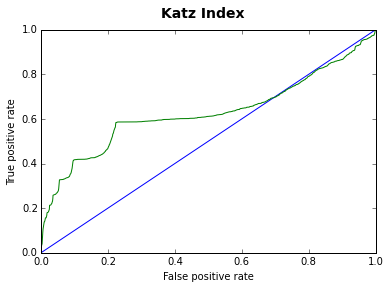

In [56]:
roc = linkprediction.ROCMetric(partitionedGraph[1], dyadScorePairs)
roc.generatePoints()
points = roc.getPoints()
plt.suptitle("Katz Index", fontsize=14, fontweight="bold")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.axis([0, 1, 0, 1])
plt.plot([0, 1], [0, 1])
plt.plot(points[0], points[1])

In [57]:
roc.areaUnderCurve()

0.6265193912667794

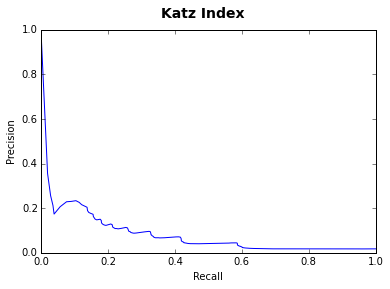

In [58]:
pr = linkprediction.PrecisionRecallMetric(partitionedGraph[1], dyadScorePairs)
pr.generatePoints()
points = pr.getPoints()
plt.suptitle("Katz Index", fontsize=14, fontweight="bold")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.plot(points[0], points[1])

In [59]:
pr.areaUnderCurve()

0.08337040974010995

In [60]:
dyadScorePairs = commonNeighborsIndex.runOnParallel(missingLinks)

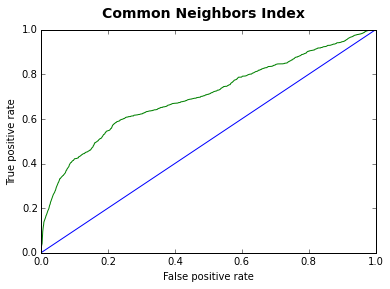

In [61]:
roc = linkprediction.ROCMetric(partitionedGraph[1], dyadScorePairs)
roc.generatePoints()
points = roc.getPoints()
plt.suptitle("Common Neighbors Index", fontsize=14, fontweight="bold")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.axis([0, 1, 0, 1])
plt.plot([0, 1], [0, 1])
plt.plot(points[0], points[1])

In [62]:
roc.areaUnderCurve()

0.7024485354361151

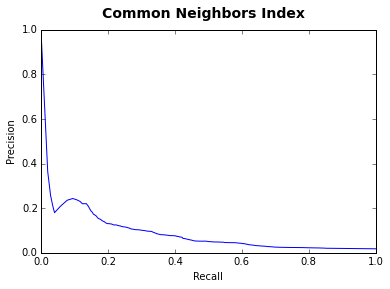

In [63]:
pr = linkprediction.PrecisionRecallMetric(partitionedGraph[1], dyadScorePairs)
pr.generatePoints()
points = pr.getPoints()
plt.suptitle("Common Neighbors Index", fontsize=14, fontweight="bold")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.axis([0, 1, 0, 1])
plt.plot(points[0], points[1])

In [64]:
pr.areaUnderCurve()

0.09129864792982387

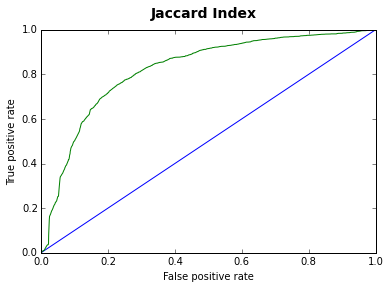

In [65]:
dyadScorePairs = jaccardIndex.runOnParallel(missingLinks)
roc = linkprediction.ROCMetric(partitionedGraph[1], dyadScorePairs)
roc.generatePoints()
points = roc.getPoints()
plt.suptitle("Jaccard Index", fontsize=14, fontweight="bold")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.axis([0, 1, 0, 1])
plt.plot([0, 1], [0, 1])
plt.plot(points[0], points[1])

In [66]:
roc.areaUnderCurve()

0.8213757702750334

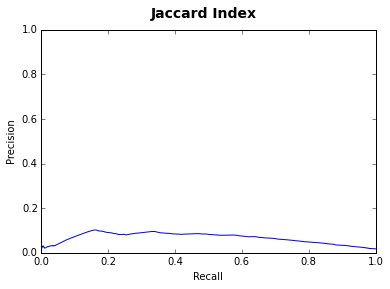

In [67]:
pr = linkprediction.PrecisionRecallMetric(partitionedGraph[1], dyadScorePairs)
pr.generatePoints()
points = pr.getPoints()
plt.suptitle("Jaccard Index", fontsize=14, fontweight="bold")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.axis([0, 1, 0, 1])
plt.plot(points[0], points[1])

In [68]:
pr.areaUnderCurve()

0.06707170068476738

In [69]:
dyadScorePairs = preferentialAttachmentIndex.runOnParallel(missingLinks)

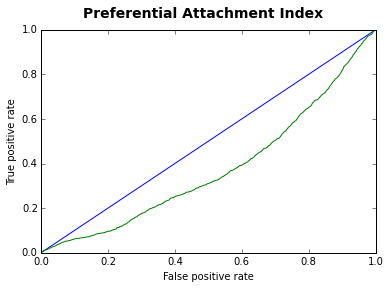

In [70]:
roc = linkprediction.ROCMetric(partitionedGraph[1], dyadScorePairs)
roc.generatePoints()
points = roc.getPoints()
plt.suptitle("Preferential Attachment Index", fontsize=14, fontweight="bold")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.axis([0, 1, 0, 1])
plt.plot([0, 1], [0, 1])
plt.plot(points[0], points[1])

In [71]:
roc.areaUnderCurve()

0.375491721457503

In [72]:
pr = linkprediction.PrecisionRecallMetric(partitionedGraph[1], dyadScorePairs)
pr.generatePoints()
points = pr.getPoints()
points

([0.0,
  0.0014044943820224719,
  0.00234192037470726,
  0.0028116213683223993,
  0.005144995322731525,
  0.006088992974238876,
  0.00841908325537886,
  0.008903467666354265,
  0.00937207122774133,
  0.010304449648711944,
  0.01077788191190253,
  0.011246485473289597,
  0.012177985948477752,
  0.012189404594467886,
  0.012652296157450796,
  0.013120899718837863,
  0.01358950328022493,
  0.014519906323185013,
  0.01499531396438613,
  0.015002344116268168,
  0.015463917525773196,
  0.01639344262295082,
  0.016869728209934397,
  0.018717828731867104,
  0.019672131147540985,
  0.02014995313964386,
  0.020618556701030927,
  0.021087160262417994,
  0.022014051522248244,
  0.02203469292076887,
  0.022492970946579195,
  0.0234192037470726,
  0.024812734082397005,
  0.02576112412177986,
  0.026241799437675725,
  0.026710402999062792,
  0.02763466042154567,
  0.028116213683223992,
  0.02812939521800281,
  0.02858481724461106,
  0.029053420805998126,
  0.029976580796252927,
  0.030459231490159326

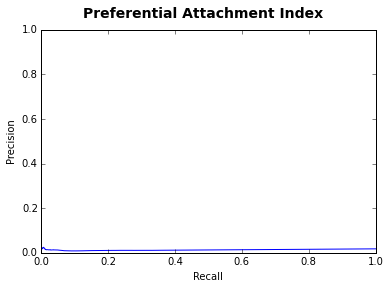

In [73]:
plt.suptitle("Preferential Attachment Index", fontsize=14, fontweight="bold")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.axis([0, 1, 0, 1])
plt.plot(points[0], points[1])

In [74]:
pr.areaUnderCurve()

0.014054176656388537

In [75]:
dyadScorePairs = adamicAdarIndex.runOnParallel(missingLinks)

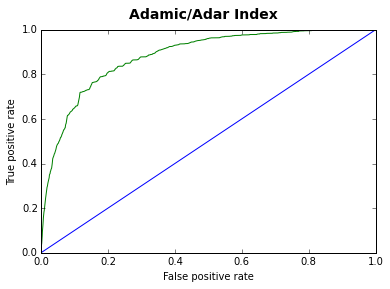

In [76]:
roc = linkprediction.ROCMetric(partitionedGraph[1], dyadScorePairs)
roc.generatePoints()
points = roc.getPoints()
plt.suptitle("Adamic/Adar Index", fontsize=14, fontweight="bold")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.axis([0, 1, 0, 1])
plt.plot([0, 1], [0, 1])
plt.plot(points[0], points[1])

In [77]:
roc.areaUnderCurve()

0.8814671920935487

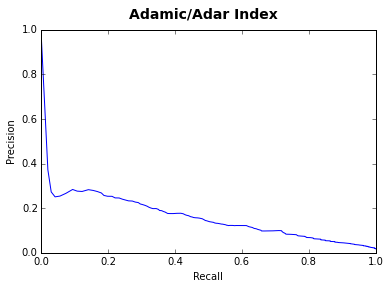

In [78]:
pr = linkprediction.PrecisionRecallMetric(partitionedGraph[1], dyadScorePairs)
pr.generatePoints()
points = pr.getPoints()
plt.suptitle("Adamic/Adar Index", fontsize=14, fontweight="bold")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.axis([0, 1, 0, 1])
plt.plot(points[0], points[1])

In [79]:
pr.areaUnderCurve()

0.1632812443965715

In [ ]:
node = partitionedGraph[0].randomNode()
nodes = partitionedGraph[0].neighbors(node)

subGraph = graph.Subgraph().fromNodes(partitionedGraph[0], nodes)

In [ ]:
LIST_LENGTH = len(nodes) - 1
a = []
color = {}
while len(a) < LIST_LENGTH:
    a.append(500)
for e in nodes:
    color[e] = len(nodes)
a.append(2000)
len(color)
color[list(color)[-1]] = len(nodes) / 2
color[list(color)[-2]] = len(nodes) / 3

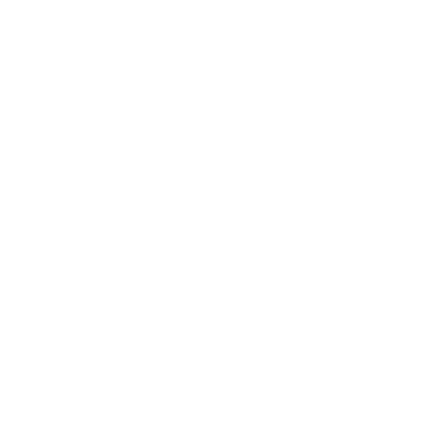

In [89]:
viztasks.drawGraph(subGraph, (7,7), False, a, None, color)

In [ ]:
crossValidator = linkprediction.KFoldCrossValidator(G, commonNeighborsIndex, roc)
crossValidator.crossValidate(10)

Traceback (most recent call last):
  File "/home/xza/Thesis/NetworKit-Esders/env/lib/python3.4/site-packages/IPython/core/interactiveshell.py", line 3032, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/home/xza/Thesis/NetworKit-Esders/env/lib/python3.4/site-packages/IPython/core/interactiveshell.py", line 3032, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-33-a162fb8f0567>", line 2, in <module>
    crossValidator.crossValidate(10)
  File "_NetworKit.pyx", line 5561, in _NetworKit.KFoldCrossValidator.crossValidate (networkit/_NetworKit.cpp:45575)
MemoryError: std::bad_alloc

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/xza/Thesis/NetworKit-Esders/env/lib/python3.4/site-packages/IPython/core/interactiveshell.py", line 1845, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'MemoryError' object has no attribute '_render_traceba

ERROR: Internal Python error in the inspect module.
Below is the traceback from this internal error.

